Chapter 32  
# Density-based spatial clustering of applications with noise (DBSCAN)
*Machine Learning Made Easy and Visual with Python*

## Initialization

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

## Sample Data

In [5]:
# Set random seed for reproducibility
np.random.seed(0)

# Number of samples to generate
n_samples = 500

# Generate a synthetic dataset of concentric circles (non-linearly separable)
dataset = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

## Data Processing

In [7]:
# Unpack features (X) and labels (y)
X, y = dataset

# Standardize features to have zero mean and unit variance
X = StandardScaler().fit_transform(X)

## Tune Epsilon

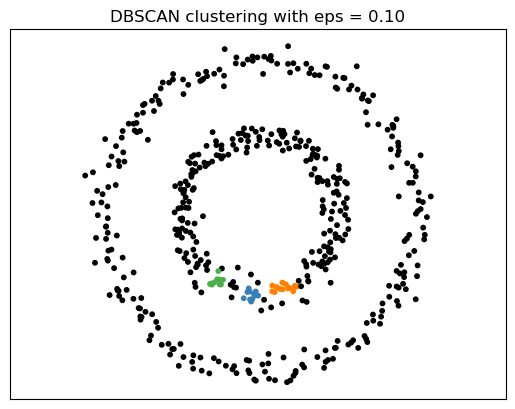

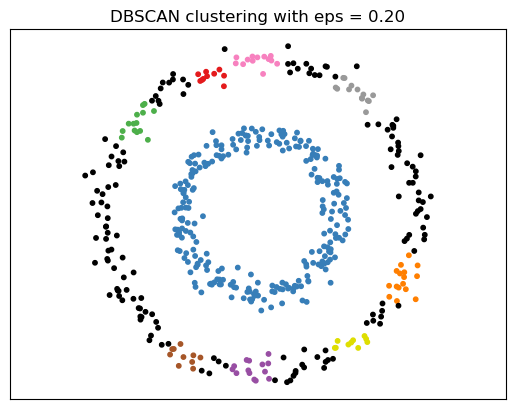

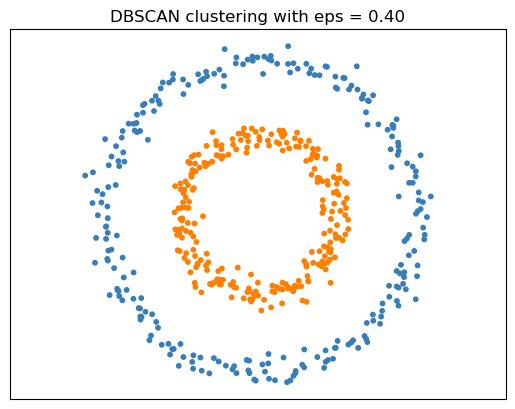

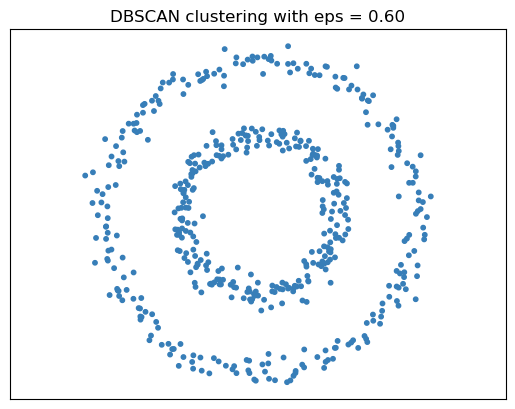

In [9]:
# Loop through different epsilon (ε) values to see DBSCAN sensitivity
for eps in np.array([0.1, 0.2, 0.4, 0.6]):
    
    # Create a DBSCAN model with current epsilon and minimum samples
    dbscan = cluster.DBSCAN(eps=eps, min_samples=10)

    # Fit DBSCAN model and get cluster labels for each data point
    y_pred = dbscan.fit_predict(X)

    # Create figure and axes
    fig, ax = plt.subplots()

    # Define a color palette for clusters
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    
    # Add black color for noise points (label = -1)
    colors = np.append(colors, ["#000000"])
    
    # Scatter plot of the data points colored by predicted cluster
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
    
    # Plot title showing the current epsilon value
    plt.title('DBSCAN clustering with eps = %0.2f' % eps)
    
    # Set axis limits for a consistent view
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    
    # Remove axis ticks
    plt.xticks(())
    plt.yticks(())
    
    # Keep aspect ratio equal for visual clarity
    plt.axis('equal')